Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  

Nulls:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survival by Sex:
 Sex
female    0.742
male      0.189
Name: Surviv

/tmp/ipython-input-1216569977.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_ageband = df.groupby('AgeBand')['Survived'].mean().round(3)


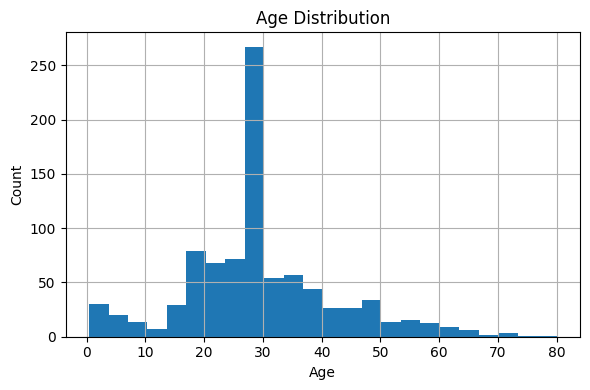

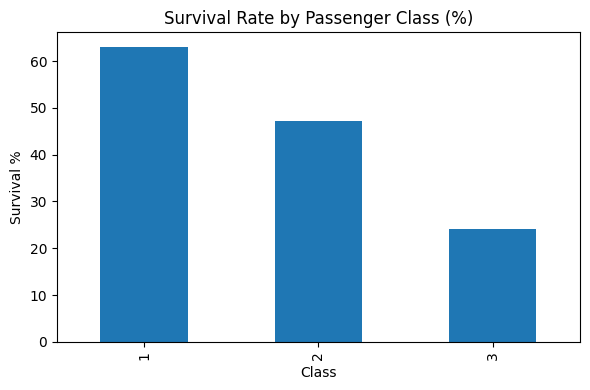


--- Headline Statements ---
1) Female survival ≈ 74.2% vs male ≈ 18.9%
2) 1st class ≈ 63.0% vs 3rd class ≈ 24.2%
3) Highest survival band: Child (by mean rate)


In [1]:
# Titanic Survival Study — Gurunandhan "Guru" Pillai
# Colab ready: Runtime > Run all

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)

# 1) Load
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2) Quick audit
print("Shape:", df.shape)
print(df.head(3))
print("\nNulls:\n", df.isna().sum())

# 3) Clean / Engineer
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['AgeBand'] = pd.cut(df['Age'], bins=[0,12,18,35,50,80],
                       labels=['Child','Teen','Young','Mid','Senior'], include_lowest=True)

# 4) Grouped insights
surv_by_sex = df.groupby('Sex')['Survived'].mean().round(3)
surv_by_pclass = df.groupby('Pclass')['Survived'].mean().round(3)
surv_by_ageband = df.groupby('AgeBand')['Survived'].mean().round(3)
print("\nSurvival by Sex:\n", surv_by_sex)
print("\nSurvival by Class:\n", surv_by_pclass)
print("\nSurvival by AgeBand:\n", surv_by_ageband)

# 5) Charts
plt.figure(figsize=(6,4))
df['Age'].hist(bins=24)
plt.title("Age Distribution"); plt.xlabel("Age"); plt.ylabel("Count")
plt.tight_layout(); plt.savefig("assets_age_hist.png"); plt.show()

plt.figure(figsize=(6,4))
(surv_by_pclass*100).plot(kind='bar')
plt.title("Survival Rate by Passenger Class (%)")
plt.xlabel("Class"); plt.ylabel("Survival %")
plt.tight_layout(); plt.savefig("assets_survival_by_class.png"); plt.show()

# 6) Export cleaned data
df.to_csv("titanic_cleaned.csv", index=False)

# 7) Headline statements (copy into README if needed)
print("\n--- Headline Statements ---")
print(f"1) Female survival ≈ {surv_by_sex['female']*100:.1f}% vs male ≈ {surv_by_sex['male']*100:.1f}%")
print(f"2) 1st class ≈ {surv_by_pclass.loc[1]*100:.1f}% vs 3rd class ≈ {surv_by_pclass.loc[3]*100:.1f}%")
print(f"3) Highest survival band: {surv_by_ageband.idxmax()} (by mean rate)")
